In [67]:
# Initial imports

import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as trade_api
import json
from datetime import datetime
from alpaca_trade_api.rest import REST, TimeFrame
# from MCForecastTools import MCSimulation

In [68]:
# Load .env enviroment variables

load_dotenv()

True

In [69]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [70]:
# Crypto API URLs

btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [71]:
response_btc = requests.get(btc_url).json()
print(json.dumps(response_btc, indent=8))

{
        "data": {
                "1": {
                        "id": 1,
                        "name": "Bitcoin",
                        "symbol": "BTC",
                        "website_slug": "bitcoin",
                        "rank": 1,
                        "circulating_supply": 18991175,
                        "total_supply": 18991175,
                        "max_supply": 21000000,
                        "quotes": {
                                "USD": {
                                        "price": 42214.0,
                                        "volume_24h": 28791679446,
                                        "market_cap": 800282014631,
                                        "percentage_change_1h": -0.557751980588446,
                                        "percentage_change_24h": 2.55642244910995,
                                        "percentage_change_7d": 7.32897941412977,
                                        "percent_change_1h": -0.557751980588446,


In [72]:
# Fetch current BTC price

price_btc = response_btc["data"]['1']['quotes']['CAD']['price']
print(price_btc)

53117.8762


In [73]:
response_eth = requests.get(eth_url).json()
print(json.dumps(response_eth, indent=8))

{
        "data": {
                "1027": {
                        "id": 1027,
                        "name": "Ethereum",
                        "symbol": "ETH",
                        "website_slug": "ethereum",
                        "rank": 2,
                        "circulating_supply": 120071441,
                        "total_supply": 120071441,
                        "max_supply": 0,
                        "quotes": {
                                "USD": {
                                        "price": 2951.36,
                                        "volume_24h": 15955282090,
                                        "market_cap": 353661929461,
                                        "percentage_change_1h": -0.857738138813024,
                                        "percentage_change_24h": 1.47232302071106,
                                        "percentage_change_7d": 12.6318431645137,
                                        "percent_change_1h": -0.85773813881302

In [74]:
# Fetch current ETH price

price_eth = response_eth["data"]['1027']['quotes']['CAD']['price']
print(price_eth)

3713.696288


In [96]:
# Compute current value of my crypto

my_btc_value = price_btc * my_btc
my_eth_value = price_eth * my_eth

total_crypto_value = my_btc_value + my_eth_value

In [97]:
# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")
print(f"The current value of your crypto is ${total_crypto_value:0.2f}")

The current value of your 1.2 BTC is $63741.45
The current value of your 5.3 ETH is $19682.59
The current value of your crypto is $83424.04


In [98]:
# Collect Investments Data Using Alpaca: SPY (stocks) and AGG (bonds)

# Set current amount of shares
my_agg = 200
my_spy = 50

In [99]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv('ALPACA_API_KEY')
# alpaca_api_key
alpaca_secret_key = os.getenv('ALPACA_SECRET_KEY')
# alpaca_secret_key

In [100]:
# Create the Alpaca API object

alpaca=trade_api.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')

In [101]:
# Set the tickers

tickers = ['AGG','SPY']

In [102]:
today = "2022-03-21"
alpaca_df = alpaca.get_bars(tickers, TimeFrame.Day, today, today, adjustment='raw').df
alpaca_df

,open,high,low,close,volume,trade_count,vwap,symbol
timestamp,,,,,,,,
2022-03-21 04:00:00+00:00,107.58,107.649,106.9841,107.04,7583668,27316,107.310151,AGG
2022-03-21 04:00:00+00:00,444.45,446.460,440.6800,444.30,85377983,912432,443.796432,SPY


In [103]:
# Pick AGG and SPY close prices

agg_close_price = alpaca_df.iloc[0, 3]
spy_close_price = alpaca_df.iloc[1, 3]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $107.04
Current SPY closing price: $444.3


In [104]:
# Compute the current value of shares

my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price
total_shares_value = my_agg_value + my_spy_value

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your shares is ${total_shares_value:0.2f}")


The current value of your 200 AGG shares is $21408.00
The current value of your 50 SPY shares is $22215.00
The current value of your shares is $43623.00


In [109]:
# Savings Health Analysis

# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
d = {'amount': [total_crypto_value, total_shares_value]}
df_savings = pd.DataFrame(data=d, index=['crypto', 'shares'])

# Display savings DataFrame
display(df_savings)

,amount
crypto,83424.041766
shares,43623.000000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

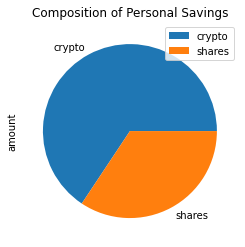

In [110]:
df_savings.plot.pie(y='amount', title='Composition of Personal Savings')

In [111]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings

total_savings = monthly_income + total_crypto_value + total_shares_value

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund.")
elif total_savings == emergency_fund:
    print("Congratulations! You have reached your financial goal.")
else:
    print(f"You are ${emergency_fund - total_savings} short of achieving your financial goal")

Congratulations! You have enough money in your emergency fund.
